In [1]:
import pandas as pd
import numpy as mp
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory research

In [3]:
#number of observations and dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
y = df['Exited']
y.shape
#y.head()

(10000,)

In [6]:
print(y.sum()/y.shape[0]*100)

20.369999999999997


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


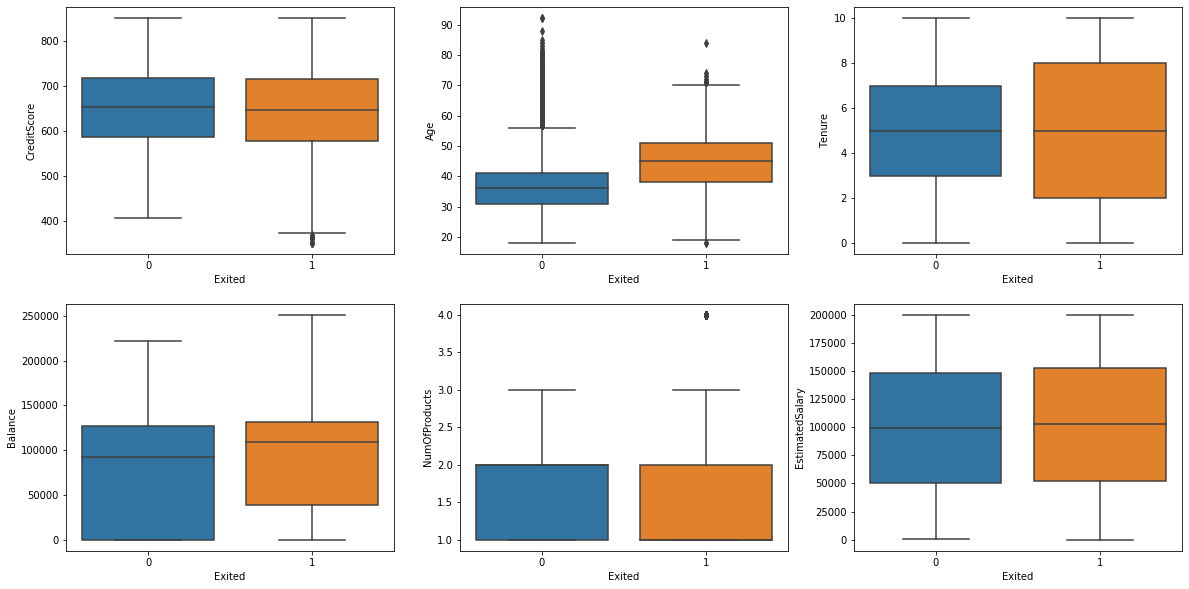

In [9]:
# numeric data
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y='CreditScore', data = df, ax = axss[0][0])
sns.boxplot(x='Exited', y='Age', data = df, ax = axss[0][1])
sns.boxplot(x='Exited', y='Tenure', data = df, ax = axss[0][2])
sns.boxplot(x='Exited', y='Balance', data = df, ax = axss[1][0])
sns.boxplot(x='Exited', y='NumOfProducts', data = df, ax = axss[1][1])
sns.boxplot(x='Exited', y='EstimatedSalary', data = df, ax = axss[1][2])


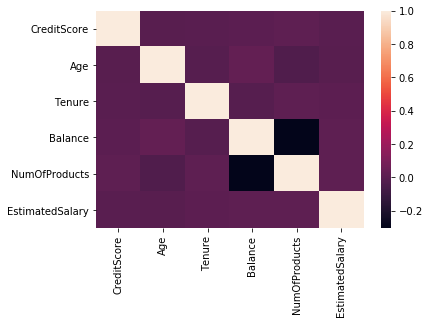

In [10]:
# numerical data correlation check
corr_score = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].corr()
sns.heatmap(corr_score)

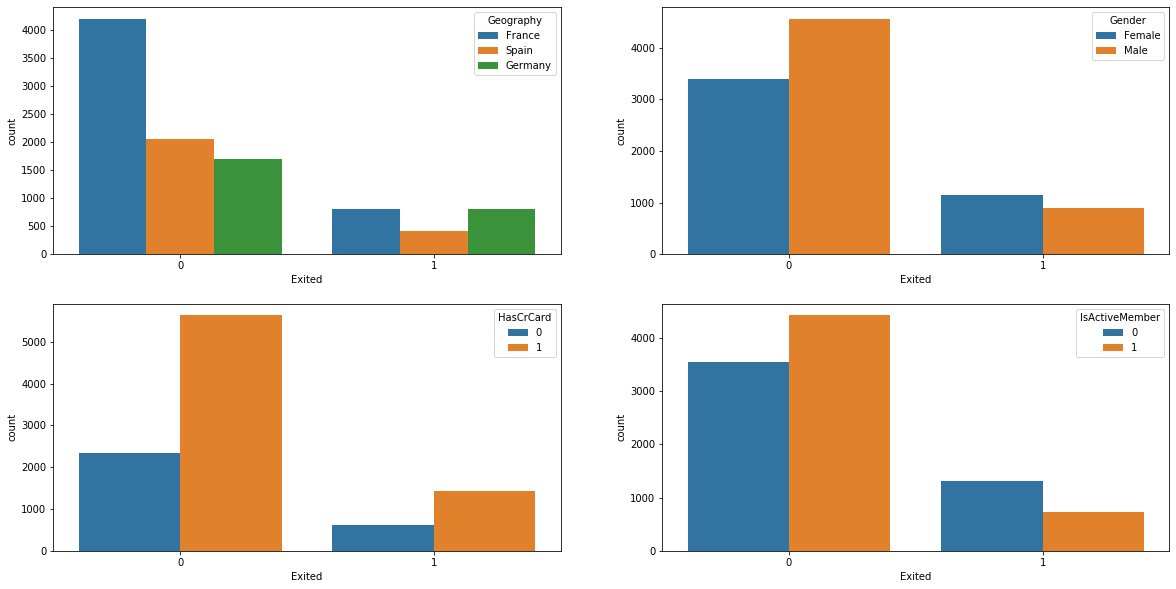

In [11]:
# categorical data
_, axss = plt.subplots(2,2, figsize = [20,10])
sns.countplot(x='Exited', hue='Geography', data = df, ax = axss[0][0])
sns.countplot(x='Exited', hue='Gender', data = df, ax = axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data = df, ax = axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data = df, ax = axss[1][1])

## Feature Preprocessing
1. categorical data encoding (feauture encoding)
2. numerical data standardization (feature scaling)

In [12]:
df = pd.get_dummies(df, columns = ['Geography','Gender'])
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [71]:
# set the X variables
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = df.drop(to_drop, axis = 1)

In [14]:
# feature scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Model Training and Result Evaluation

In [15]:
# train test partition
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state = 1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 13 features
test data has 2500 observation with 13 features


In [16]:
# build the classifier
cl_lgt = LogisticRegression()
cl_knn = KNeighborsClassifier()
cl_rf = RandomForestClassifier()
cl_svm = SVC()

In [17]:
model_names = ['Logistic Regression','KNN','Random Forest','SVM']
classifiers = [cl_lgt, cl_knn, cl_rf, cl_svm]
count = 0

for i in classifiers:
    cv_score = model_selection.cross_val_score(i, X_train, y_train,scoring = 'roc_auc', cv = 5)
    print('model accuracy of ', model_names[count], ' is ', cv_score.mean())
    count += 1
# scoring default is accuracy, using confusion matrix to see the details of precision and recall. 
# draw graphs to see the AUC

model accuracy of  Logistic Regression  is  0.7631114722181815
model accuracy of  KNN  is  0.7691070195793359
model accuracy of  Random Forest  is  0.8509139601773512
model accuracy of  SVM  is  0.8306231032549283


### hyperparameter tuning
This is a strength of the above classifier selection. The above methods use the default regularization. This part is the methods of how to tune hyperparameters that are not necessary be the default value.

In [18]:
from sklearn.model_selection import GridSearchCV
# pass the parameters to the given classifier/regressor one by one and out put the best

In [19]:
def print_gird_search_metrics(gs_result):
    print('Best score: ', (gs_result.best_score_))
    print('Parameter set: ')
    best_parameters = gs_result.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name, ':', best_parameters[param_name])

In [20]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C':[0.01, 0.1, 1, 5, 10]
}

In [21]:
grid_lr = GridSearchCV(LogisticRegression(solver = 'liblinear'), parameters, cv = 5)
grid_lr.fit(X_train, y_train)
print_gird_search_metrics(grid_lr)

Best score:  0.8125333333333333
Parameter set: 
C : 0.1
penalty : l1


In [22]:
grid_lr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
best_cl_lr = grid_lr.best_estimator_

In [24]:
parameters = {
    'n_neighbors': [1,3,5,7,9]
}

In [25]:
grid_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5)
grid_knn.fit(X_train, y_train)
print_gird_search_metrics(grid_knn)

Best score:  0.8324
Parameter set: 
n_neighbors : 9


In [26]:
best_cl_knn = grid_knn.best_estimator_

In [27]:
parameters = {
    'n_estimators':[40,60,80]
}

In [28]:
grid_rf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
grid_rf.fit(X_train, y_train)
print_gird_search_metrics(grid_rf)

Best score:  0.8624
Parameter set: 
n_estimators : 60


In [29]:
best_cl_rf = grid_rf.best_estimator_

In [58]:
parameters = {
    'C':[0.01,0.1,1,5,10]
}
grid_svm = GridSearchCV(SVC(probability = True), parameters, cv=5)
grid_svm.fit(X_train, y_train)
print_gird_search_metrics(grid_svm)

Best score:  0.8577333333333333
Parameter set: 
C : 5


In [59]:
best_cl_svm = grid_svm.best_estimator_

## Model evaluation with confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [33]:
# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        

Random Forest
Accuracy is: 0.8576
precision is: 0.776173285198556
recall is: 0.4223968565815324


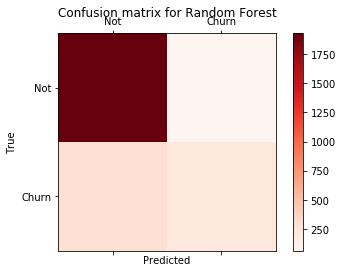

Logistic Regression
Accuracy is: 0.8108
precision is: 0.6139240506329114
recall is: 0.1905697445972495


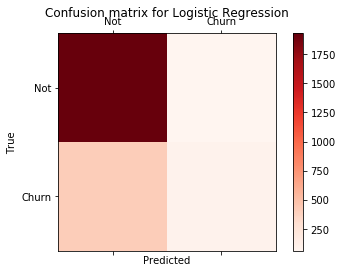

K nearest neighbor
Accuracy is: 0.832
precision is: 0.6772908366533864
recall is: 0.33398821218074654


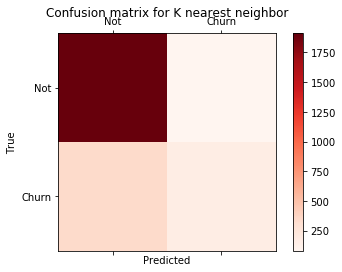

SVM
Accuracy is: 0.8572
precision is: 0.7714285714285715
recall is: 0.4243614931237721


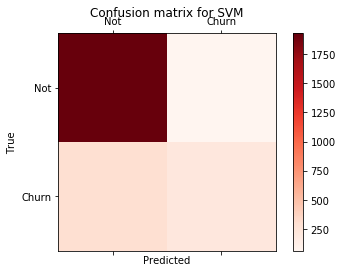

In [35]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_cl_rf.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_cl_lr.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_cl_knn.predict(X_test))),
    ("SVM", confusion_matrix(y_test, best_cl_svm.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

## Model evaluation with ROC & AUC

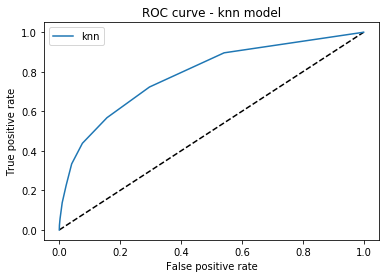

In [43]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_knn = best_cl_knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn, tpr_knn, label = 'knn')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - knn model')
plt.legend(loc='best')
plt.show()

In [49]:
y_pred_knn[2000]

0.6666666666666666

In [57]:
y_test.iloc[[2000]]

3370    1
Name: Exited, dtype: int64

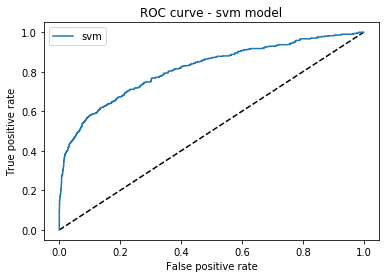

In [61]:
y_pred_svm = best_cl_svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_svm, tpr_svm, label = 'svm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - svm model')
plt.legend(loc='best')
plt.show()

### Feature Importance

In [62]:
forest =RandomForestClassifier()
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
importances = forest.feature_importances_

In [64]:
importances

array([0.14538081, 0.23737564, 0.08314803, 0.14333878, 0.12793502,
       0.01854343, 0.04103129, 0.14617141, 0.01002176, 0.02108444,
       0.00879937, 0.00736637, 0.00980364])

In [68]:
import numpy as np
indices = np.argsort(importances)[::-1]

In [69]:
indices

array([ 1,  7,  0,  3,  4,  2,  6,  9,  5,  8, 12, 10, 11], dtype=int64)

In [81]:
for ind in range(X.shape[1]):
    print("featur {0}:rank {1}".format(str(X.columns[indices[ind]]), str(round(importances[indices[ind]],4))))

featur Age:rank 0.2374
featur EstimatedSalary:rank 0.1462
featur CreditScore:rank 0.1454
featur Balance:rank 0.1433
featur NumOfProducts:rank 0.1279
featur Tenure:rank 0.0831
featur IsActiveMember:rank 0.041
featur Geography_Germany:rank 0.0211
featur HasCrCard:rank 0.0185
featur Geography_France:rank 0.01
featur Gender_Male:rank 0.0098
featur Geography_Spain:rank 0.0088
featur Gender_Female:rank 0.0074
